<a href="https://colab.research.google.com/github/F1avie/ModIA_TP1/blob/master/code/nlp/INSA_NLP_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

During this practical session, we will use on the [AG's corpus of news article]():  
*AG News (AG’s News Corpus) is a subdataset of [AG's corpus](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html) of news articles constructed by assembling titles and description fields of articles from the 4 largest classes (“World”, “Sports”, “Business”, “Sci/Tech”) of AG’s Corpus. The AG News contains 30,000 training and 1,900 test samples per class.*  

Let's first download the dataset:

In [1]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv 2>&1
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv 2>&1

--2022-11-14 13:41:45--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2022-11-14 13:41:45--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.3’

train.csv.3         100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2022-11-14 13:41:46 (247 MB/s) - ‘train.csv.3’ saved [29470338/29470338]



The following code will load the dataset and add the label names in a new column.

In [2]:
import pandas as pd

traindf = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(2000)
testdf = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(1000)

traindf['label'] = traindf['label'] -1
traindf['label_name'] = traindf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf['label'] = testdf['label'] -1
testdf['label_name'] = testdf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf

label                                              title  \
171       3              Cops Test Handheld Fingerprint Reader   
3958      0   War in Iraq Did Not Make World Safer, Annan Says   
5641      0                      Final respects paid to Arafat   
7237      0  Two Aid Workers Killed in Attack on Darfur Aid...   
4992      0             Car Bomb Kills at Least Six in Baghdad   
...     ...                                                ...   
6452      1              NBA Game Summary - Portland at Dallas   
4490      2                   Citigroup to Close Unit in Japan   
1415      2      US Treasuries cut early gains on jobless drop   
1225      0                   Public warning over letter bombs   
3671      2             Microsoft Launches New Media Center PC   

                                                   text label_name  
171   Several Minnesota police departments are field...   Sci/Tech  
3958  LONDON, Oct. 17 -- The US-led war in Iraq has ...      World  
5641  Palestinians pay their last respects to Yasser...      World  
7237   KHARTOUM (Reuters) - Two employees of a Briti...      World  
4992  A car bomb exploded outside the Education Mini...      World  
...                                                 ...        ...  
6452  Dallas, TX (Sports Network) - Dirk Nowitzki sc...     Sports  
4490  Citigroup Inc. said Monday it will close its t...   Business  
1415  US Treasury debt prices cut early gains but re...   Business  
1225  The discovery of 10 letter bombs has prompted ...      World  
3671  Microsoft Corp. MSFT.O on Tuesday unveiled a n...   Business  

[1000 rows x 4 columns]

Start with a little bit of exploration:  
Using the Wordcloud library and follow the example provided by the [documentation](https://amueller.github.io/word_cloud/auto_examples/simple.html#sphx-glr-auto-examples-simple-py) to plot the most common words in the corpus.  
Do do so, you should starts by joining all documents within a single one. A simple way consits in using the ```" ".join()``` function on a list of text...

AP - A rare okapi  #151; something of a cross between a giraffe and a zebra  #151; born at the St. Louis Zoo this summer is doing well despite a shaky relationship with its mother, zoo officials said Wednesday. LOS ANGELES (Reuters) - Serena Williams ended Amelie  Mauresmo's hopes of grabbing the year-end number one ranking by  beating the Frenchwoman 4-6, 7-6, 6-4 in the semi-finals of the  WTA Tour Championships Sunday.The Barracuda 7200.8 series packs more data on the hard-drive platters.SAN FRANCISCO (CBS.MW) -- Marsh  amp; McLennan said late Thursday that five directors, who are also executives at the insurance broker, have stepped down from the board.On Thursday, in what could be a breakthrough for the interim Iraqi government and the coalition forces, a representative of Moqtada al-Sadr, the 30-something Shiite seminary student, announced Asian stocks fell in US trading after Xilinx Inc. and Altera Corp., the largest makers of programmable computer chips, cut their sales forecas

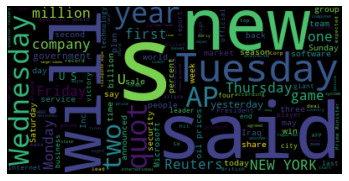

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
a = traindf["text"]
corpus = "".join(a)
print(corpus)
wordcloud = WordCloud().generate(corpus)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

By default Wordcloud removes the most common words used in english (and, or, the, a ...). It is still possible to provide a custom list. 
[NLTK](https://www.nltk.org/) is a powerfull library for natural language processing. It provides a several lists of stop words that can be used to clean text.  
Even if it doesn't change the result here let's provide Wordcloud with a custom list of stopwords taken from NLTK.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


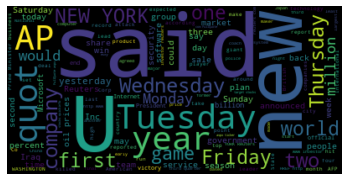

In [4]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

wordcloud = WordCloud(stopwords=stop_words).generate(corpus)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Now, plot a different wordcloud for every category in the dataset.  
Would you be capable of predicting the categories given only thiese wordclouds?

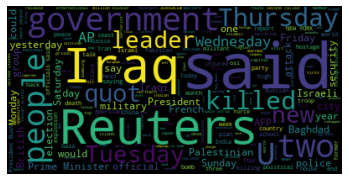

In [5]:
groups = traindf.groupby(traindf.label)
zero = groups.get_group(0)
z = zero["text"]

corpusz = "".join(z)
wordcloud = WordCloud(stopwords=stop_words).generate(corpusz)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

        label                                              title  \
90587       1    Williams Downs Mauresmo to Reach WTA Tour Final   
108972      1  U.S. Doping Watchdog to Question BALCO's Conte...   
12585       1         Funk, Johnson Lead Buick Championship (AP)   
87700       1   Grizzlies find Lakers perfect cure for 0-4 start   
89891       1  Rugby-Ireland erase tour woes with win over Sp...   
...       ...                                                ...   
53951       1  Cards Roll, and It's Getting Late Early for Do...   
96451       1           Oklahoma Could Get Blowout It Needs (AP)   
46343       1    Citywide event attracts more than 1,000 entries   
117694      1              Notebook: Washington move in jeopardy   
50374       1        Sportsview: Dodgers' Season Mysterious (AP)   

                                                     text label_name  
90587    LOS ANGELES (Reuters) - Serena Williams ended...     Sports  
108972   HELSINKI (Reuters) - U.S. anti-d

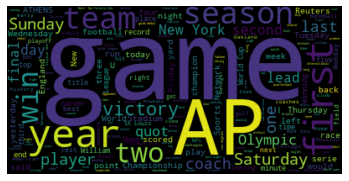

In [6]:
un = groups.get_group(1)
print(un)
u = un["text"]

corpusu = "".join(u)
wordcloud = WordCloud(stopwords=stop_words).generate(corpusu)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

        label                                              title  \
95822       2  Directors also delay decision on first-quarter...   
111632      2  Asian Stocks Fall in US, Led by Technology Sha...   
49358       2               Health Care Can Be Cured: Here's How   
30086       2  IBM, Kodak team up to make image sensors for c...   
74627       2  Nortel Postpones Restatement Filing to Mid-Nov...   
...       ...                                                ...   
78677       2  Japan #39;s Nikkei Average, Topix Fall; DoCoMo...   
77014       2  Start planning today to reduce your tax bill i...   
115049      2    Motorola May Lose Big Customer If Nextel Merges   
42540       2                   New \$50 Bill Begins Circulating   
84999       2        Delta: \$135 Million Added Liquidity Needed   

                                                     text label_name  
95822   SAN FRANCISCO (CBS.MW) -- Marsh  amp; McLennan...   Business  
111632  Asian stocks fell in US trading a

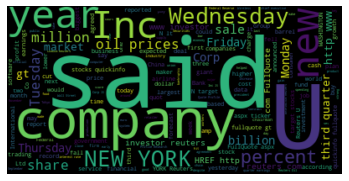

In [7]:
deux = groups.get_group(2)
print(deux)
d = deux["text"]

corpusd = "".join(d)
wordcloud = WordCloud(stopwords=stop_words).generate(corpusd)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

        label                                              title  \
87397       3         Rare Okapi Calf Doing Well at Mo. Zoo (AP)   
95294       3                     Seagate drive joins 400GB club   
107249      3  IBM discloses details of chip (SiliconValley.com)   
67625       3             Samsung Shows 5-Megapixel Camera Phone   
23067       3                          Allchin #39;s last stand?   
...       ...                                                ...   
7978        3  BEA Systems Ships All-In-One App Platform For ...   
17332       3  US government, companies warn of critical Orac...   
66324       3                          FCC seeks power over VOIP   
90082       3      McAfee, CA integrate anti-spyware (InfoWorld)   
14567       3           MSN Music: It #39;s really about Windows   

                                                     text label_name  
87397   AP - A rare okapi  #151; something of a cross ...   Sci/Tech  
95294   The Barracuda 7200.8 series packs

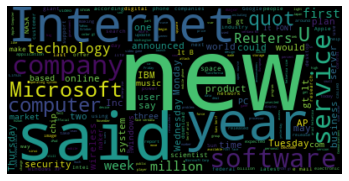

In [8]:
trois = groups.get_group(3)
print(trois)
t = trois["text"]

corpust = "".join(t)
wordcloud = WordCloud(stopwords=stop_words).generate(corpust)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Bag-of-Words  
We will now train different models to predict the category of these news articles.  
We saw, during the course, a first approach called "*bag of words*".  
BOW methods describe documents using counts or statistics on the words composing the documents. Once the bag-of-words is computed, documents are represented by vectors whose dimensions correspond to words present in the corpus vocabulary.  

First, we will vectorize our documents using term frequencies.  
Look at the documentation of [scikit-learn's CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to encode the __text column__ of your training set.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(traindf["text"])

The ```vocabulary_``` argument of your vectorizer contains a dictionnary with all the token and their corresponding index in the bag-of-words.  
How many unique tokens compose you bag-of-words?

In [10]:
len(vectorizer.vocabulary_)

10329

You can also use the ```get_feature_names_out()``` method to get the list of identified tokens:

In [11]:
vectorizer.get_feature_names_out()

array(['00', '000', '000th', ..., 'zook', 'zurich', 'zvonareva'],
      dtype=object)

Now choose a classification method from scikit-learn and train it to classify news article.  
Print the classification score of your model on the training set.

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, traindf['label'] )
clf.score(X, traindf['label'] )

1.0

Now use the ```transform``` method from your vectorizer on the testing set and print the score obtained by your model on the testing set.  
Your model is probably overfitting a lot.  
Plot a [consusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), to see where your model makes most mistakes.

In [13]:
Xtest = vectorizer.transform(testdf["text"])
clf.score(Xtest, testdf['label'] )

0.788

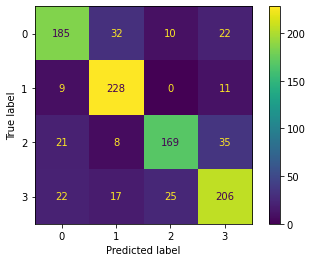

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(Xtest)
cm = confusion_matrix(testdf['label'], predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() 

Play with some of the vectorizer hyper-parameters to see whether you can improve the perfomance of your classifier on the testing set.  
Try adding stopwords or changing the ngram_range...

10199
score:  0.799


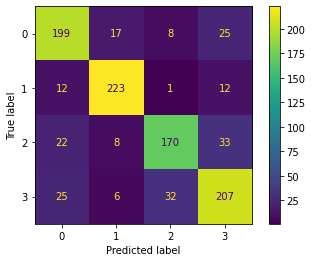

In [15]:
vectorizerst = CountVectorizer(stop_words=stop_words)
Xst = vectorizerst.fit_transform(traindf["text"])
print(len(vectorizerst.vocabulary_))
clfst = RandomForestClassifier()
clfst.fit(Xst, traindf['label'] )
clfst.score(Xst, traindf['label'] )
Xtestst = vectorizerst.transform(testdf["text"])
print('score: ' , clfst.score(Xtestst, testdf['label'] ))

predictionsst = clfst.predict(Xtestst)

cmst = confusion_matrix(testdf['label'], predictionsst, labels=clf.classes_)
dispst = ConfusionMatrixDisplay(confusion_matrix=cmst,display_labels=clf.classes_)
dispst.plot() 

Once you are satisfied with the performance or that you do not manage to improve it, plot a t-SNE of your training representations with labels as colors.  
In particular, compare the t-SNE representations computed with and without stop words.  
What do you observe?

In [16]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns 

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 4).fit_transform(X)
X_embeddedst = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 4).fit_transform(Xst)

<function matplotlib.pyplot.show(*args, **kw)>

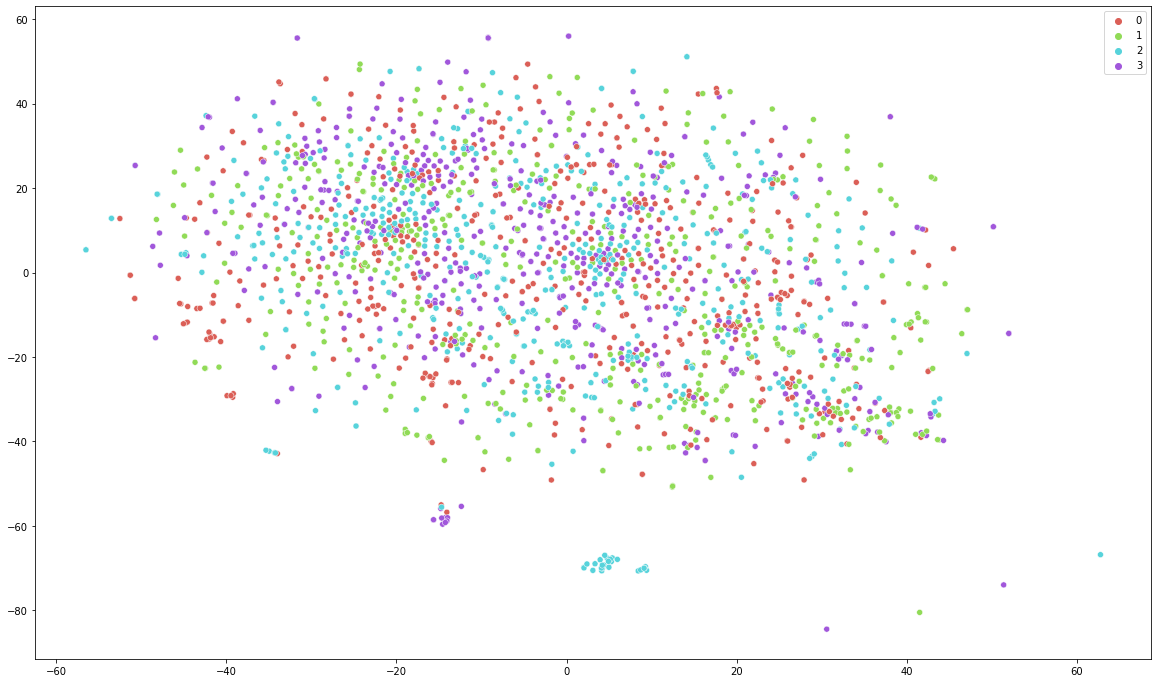

In [17]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

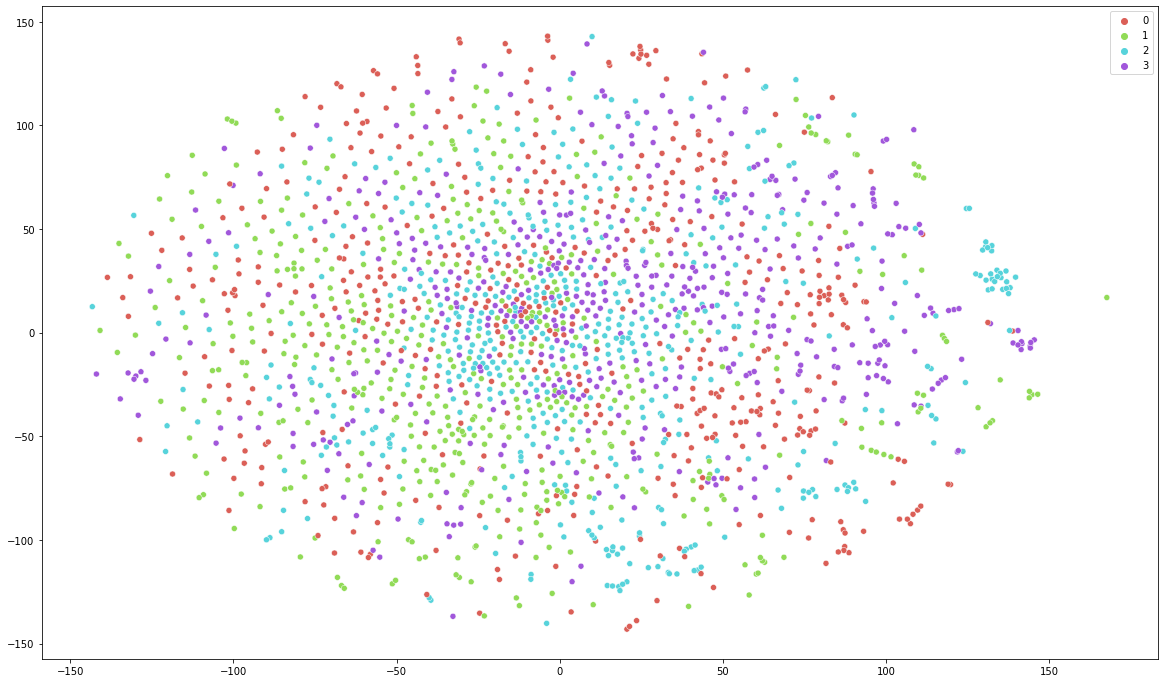

In [18]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=X_embeddedst[:,0], y=X_embeddedst[:,1], palette=sns.color_palette("hls", 4), hue=traindf["label"].tolist())
plt.show

We will now use a second type of vectorization strategy, a little bit more efficient than pure term frequency: TF-idf.  
What is the difference with the previous method?  
Use [scikit-lear's ```TfidfVectorizer```](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer) to vectorize the documents in your corpus and train a classification algorithm to classify documents.  
Print the score you obtain on the testing set and the corresponding confusion matrix.


score:  0.804


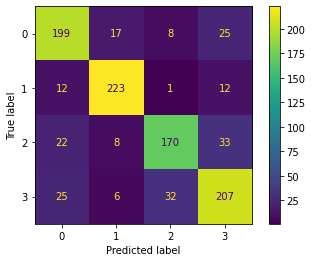

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(traindf["text"])

RF = RandomForestClassifier()
RF.fit(X, traindf['label'] )
RF.score(X, traindf['label'] )
Xtest = vectorizer.transform(testdf["text"])
print('score: ' , RF.score(Xtestst, testdf['label'] ))
pred = RF.predict(Xtest)
cm = confusion_matrix(testdf['label'], pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmst,display_labels=clf.classes_)
disp.plot() 

Plot a t-SNE of the representations obtained using TF-IDF.

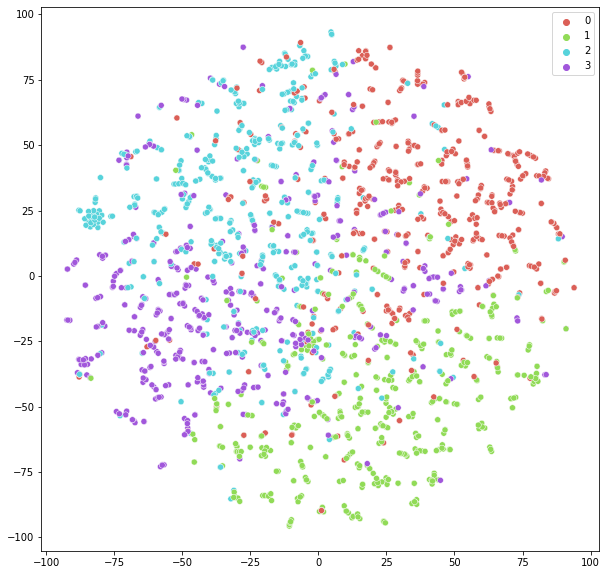

In [20]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

Both the ```TfidfVectorizer``` and ```CountVeccorizer``` use a default strategy to create a token given a text consisting in using whitespaces and punctuations as separators.  
It is possible to provide custom __tokenizers__ to these vectorizers.  
Here we will use NLTK to build a more powerfull tokenizer that will:

*   Revmove stop words
*   Convert all texts to lower case
*   Ignore punctuations symbols
*   Only consider letters
*   Perform Stemming on every token



In [21]:
from nltk import word_tokenize          
from nltk.stem import SnowballStemmer
import nltk
from nltk.corpus import stopwords
import re


nltk.download('punkt')
nltk.download('stopwords')
# Download stopwords list

stop_words = set(stopwords.words('english')) 

# Interface lemma tokenizer from nltk with sklearn
class StemTokenizer:
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']
    def __init__(self):
        self.stemmer = SnowballStemmer('english')
    def __call__(self, doc):
        doc = doc.lower()
        return [self.stemmer.stem(t) for t in word_tokenize(re.sub("[^a-z' ]", "", doc)) if t not in self.ignore_tokens]

tokenizer=StemTokenizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Print an example of text from the dataset and the corresponding tokens computed by the tokenizer.

In [22]:
[tokenizer(t) for t in traindf['text']]

[['ap',
  'a',
  'rare',
  'okapi',
  'someth',
  'of',
  'a',
  'cross',
  'between',
  'a',
  'giraff',
  'and',
  'a',
  'zebra',
  'born',
  'at',
  'the',
  'st',
  'loui',
  'zoo',
  'this',
  'summer',
  'is',
  'do',
  'well',
  'despit',
  'a',
  'shaki',
  'relationship',
  'with',
  'it',
  'mother',
  'zoo',
  'offici',
  'said',
  'wednesday'],
 ['los',
  'angel',
  'reuter',
  'serena',
  'william',
  'end',
  'ameli',
  'mauresmo',
  "'s",
  'hope',
  'of',
  'grab',
  'the',
  'yearend',
  'number',
  'one',
  'rank',
  'by',
  'beat',
  'the',
  'frenchwoman',
  'in',
  'the',
  'semifin',
  'of',
  'the',
  'wta',
  'tour',
  'championship',
  'sunday'],
 ['the',
  'barracuda',
  'seri',
  'pack',
  'more',
  'data',
  'on',
  'the',
  'harddriv',
  'platter'],
 ['san',
  'francisco',
  'cbsmw',
  'marsh',
  'amp',
  'mclennan',
  'said',
  'late',
  'thursday',
  'that',
  'five',
  'director',
  'who',
  'are',
  'also',
  'execut',
  'at',
  'the',
  'insur',
  'br

In [23]:
t = traindf['text'].iloc[1]
print(t)
tokenizer(t)

 LOS ANGELES (Reuters) - Serena Williams ended Amelie  Mauresmo's hopes of grabbing the year-end number one ranking by  beating the Frenchwoman 4-6, 7-6, 6-4 in the semi-finals of the  WTA Tour Championships Sunday.


['los',
 'angel',
 'reuter',
 'serena',
 'william',
 'end',
 'ameli',
 'mauresmo',
 "'s",
 'hope',
 'of',
 'grab',
 'the',
 'yearend',
 'number',
 'one',
 'rank',
 'by',
 'beat',
 'the',
 'frenchwoman',
 'in',
 'the',
 'semifin',
 'of',
 'the',
 'wta',
 'tour',
 'championship',
 'sunday']

Now provide the tokenizer to the a ```TfidfVectorizer``` and restart the entire pipeline.  
Does it improves the testing performance?  
Tips: you should also provided a tokenized version of the stopwords since we apply stemming on all tokens.

score:  0.801


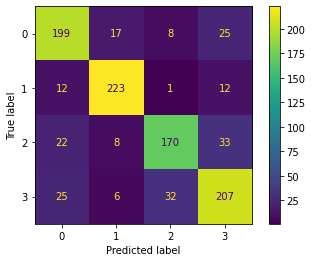

In [24]:
token_stop = tokenizer(' '.join(stop_words))

tfidf = TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer)
X = vectorizer.fit_transform(traindf["text"])
RF = RandomForestClassifier()
RF.fit(X, traindf['label'] )
RF.score(X, traindf['label'] )
Xtest = vectorizer.transform(testdf["text"])
print('score: ' , RF.score(Xtestst, testdf['label'] ))
pred = RF.predict(Xtest)
cm = confusion_matrix(testdf['label'], pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmst,display_labels=clf.classes_)
disp.plot() 

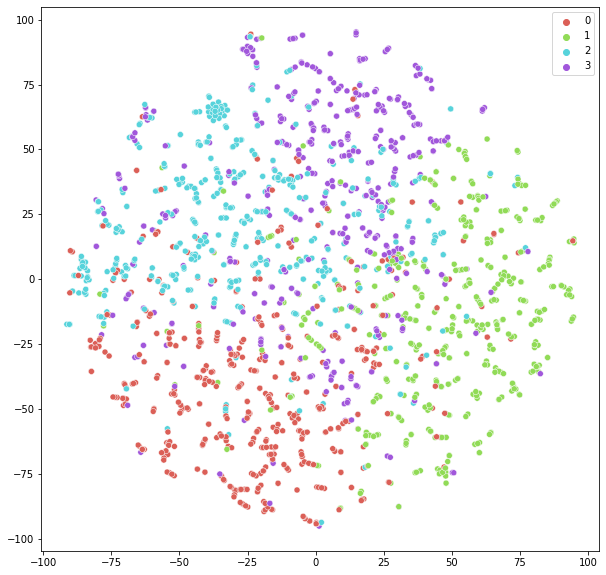

In [25]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

It is also possible to combine bag-of-words features with other features manually computed.  
The following code computes some new features on all documents.

In [26]:
def count_chars(text):
    return len(text)

def count_words(text):
    return len(text.split())

def count_capital_words(string):
    return sum(map(str.isupper, string))

def count_capital_words(text):
  return sum(map(str.isupper,text.split()))

def count_punctuations(text):
  count = 0
  for i in range (0, len (text)):   
    if text[i] in ('!', "," ,"\'" ,";" ,"\"", ".", "-" ,"?"):  
        count = count + 1; 
  return  count

def count_sentences(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

for df in [traindf, testdf]:
  df['count_chars'] = df.text.apply(lambda s: count_chars(s))
  df['count_words'] = df.text.apply(lambda s: count_words(s))
  df['count_capital_words'] = df.text.apply(lambda s: count_capital_words(s))
  df['count_capital_words'] = df.text.apply(lambda s: count_capital_words(s))
  df['count_punctuations'] = df.text.apply(lambda s: count_punctuations(s))
  df['count_sentences'] = df.text.apply(lambda s: count_sentences(s))
  df['count_unique_words'] = df.text.apply(lambda s: count_unique_words(s))
  df['avg_wordlength'] = df['count_chars']/df['count_words']
  df['avg_sentlength'] = df['count_words']/df['count_sentences']

Using a [```ColumnTransformer```](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer) it is possible to combine all the features.

In [27]:
from sklearn.compose import ColumnTransformer

columns_to_keep = ['text', 'count_chars', 'count_words',
       'count_capital_words', 'count_punctuations',
       'count_unique_words', 'count_sentences', 'avg_wordlength',
       'avg_sentlength']

column_trans = ColumnTransformer(
    [('categories', TfidfVectorizer(stop_words=token_stop, tokenizer=tokenizer), 'text')],
    remainder='passthrough', verbose_feature_names_out=False)

X_train = column_trans.fit_transform(traindf[columns_to_keep])
X_test = column_trans.transform(testdf[columns_to_keep])

Unfortunatly in our case, these features do not provide any improvement on the testing performance.  
In some other tasks like spam detection they can have a stronger influence.

Model score on training data: 1.00
Model score on test data: 0.793


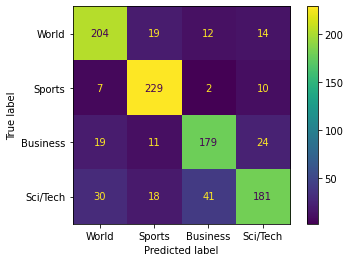

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, traindf.label)
print(f"Model score on training data: {rf.score(X_train, traindf.label):.2f}")
print(f"Model score on test data: {rf.score(X_test, testdf.label)}")

predictions = rf.predict(X_test)
cm = confusion_matrix(testdf.label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["World", "Sports", "Business", "Sci/Tech"])
disp.plot()
plt.show()

# Word2Vec

We will now use a second vectorization technique, seen during the course lectures: word vectorization.  
Fisrt, we will use the Gensim library to compute or download pre-computed word embeddings.

In [29]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [30]:
!wget https://nlp.stanford.edu/data/glove.6B.zip 
!unzip glove.6B.zip > /dev/null 2>&1

--2022-11-14 13:43:06--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-14 13:43:07--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

glove.6B.zip.2      100%[===================>] 822.24M  5.10MB/s    in 2m 39s  

2022-11-14 13:45:47 (5.16 MB/s) - ‘glove.6B.zip.2’ saved [862182613/862182613]



In [31]:
glove_file = ('glove.6B.100d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

The model is a mapping between words and their vector representations.

In [44]:
model['apple']

array([-0.5985   , -0.46321  ,  0.13001  , -0.019576 ,  0.4603   ,
       -0.3018   ,  0.8977   , -0.65634  ,  0.66858  , -0.49164  ,
        0.037557 , -0.050889 ,  0.6451   , -0.53882  , -0.3765   ,
       -0.04312  ,  0.51384  ,  0.17783  ,  0.28596  ,  0.92063  ,
       -0.49349  , -0.48583  ,  0.61321  ,  0.78211  ,  0.19254  ,
        0.91228  , -0.055596 , -0.12512  , -0.65688  ,  0.068557 ,
        0.55629  ,  1.611    , -0.0073642, -0.48879  ,  0.45493  ,
        0.96105  , -0.063369 ,  0.17432  ,  0.9814   , -1.3125   ,
       -0.15801  , -0.54301  , -0.13888  , -0.26146  , -0.3691   ,
        0.26844  , -0.24375  , -0.19484  ,  0.62583  , -0.7377   ,
        0.38351  , -0.75004  , -0.39053  ,  0.091498 , -0.36591  ,
       -1.4715   , -0.45228  ,  0.2256   ,  1.1412   , -0.38526  ,
       -0.06716  ,  0.57288  , -0.39191  ,  0.31302  , -0.29235  ,
       -0.96157  ,  0.15154  , -0.21659  ,  0.25103  ,  0.096967 ,
        0.2843   ,  1.4296   , -0.50565  , -0.51374  , -0.4721

It also has usefull methods to explore the  vocabulary's embeddings.  
Here are some examples to find the most similar words in the embedding space. 
Try with some other words and look if the most similar words seem plausibles.

In [45]:
model.most_similar('zuckerberg')

[('facebook', 0.6360230445861816),
 ('linkedin', 0.6329243183135986),
 ('myspace', 0.6072915196418762),
 ('saverin', 0.6035687923431396),
 ('dewolfe', 0.5960867404937744),
 ('friendster', 0.5935790538787842),
 ('twitter', 0.5506225824356079),
 ('salzman', 0.5457445383071899),
 ('zynga', 0.5324302911758423),
 ('berkowitz', 0.515297532081604)]

In [46]:
model.most_similar('google')

[('yahoo', 0.8637359142303467),
 ('microsoft', 0.8104099035263062),
 ('web', 0.7629813551902771),
 ('aol', 0.7571687698364258),
 ('facebook', 0.7516582012176514),
 ('internet', 0.7383222579956055),
 ('ebay', 0.7163311243057251),
 ('netscape', 0.7149453163146973),
 ('msn', 0.7122776508331299),
 ('online', 0.6866507530212402)]

In [47]:
model.most_similar('intelligence')

[('cia', 0.742180585861206),
 ('information', 0.7210196256637573),
 ('security', 0.6963101625442505),
 ('fbi', 0.6962289810180664),
 ('military', 0.6934822201728821),
 ('secret', 0.6893364191055298),
 ('counterterrorism', 0.6762625575065613),
 ('pentagon', 0.6651185154914856),
 ('defense', 0.6564568281173706),
 ('agents', 0.6406551599502563)]

In [48]:
model.most_similar(negative='network')

[('http://www.opel.com', 0.6100396513938904),
 ('rw95', 0.609157919883728),
 ('str94', 0.6089513301849365),
 ('js04bb', 0.5794222354888916),
 ('gph04bb', 0.5685352087020874),
 ('kd95', 0.5646697282791138),
 ('greg.wilcoxdailynews.com', 0.562753438949585),
 ('http://www.ecb.int', 0.5608885884284973),
 ('kanamori', 0.5443101525306702),
 ('jamadagni', 0.5430979132652283)]

An other cool feature of Word2Vec is the possibility to perform analogies.  
The most famous example is certainly king - man + woman = queen.  
Try to find other working analogies.

In [49]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [50]:
result = model.most_similar(positive=['paris', 'spain'], negative=['france'])
print("{}: {:.4f}".format(*result[0]))

madrid: 0.8061


In [51]:
result = model.most_similar(positive=['clinton', 'republican'], negative=['democrat'])
print("{}: {:.4f}".format(*result[0]))

bush: 0.8654


In [52]:
result = model.most_similar(positive=['beer', 'france'], negative=['usa'])
for i in range(3):
  print("{}: {:.4f}".format(*result[i]))

champagne: 0.5996
wine: 0.5771
bordeaux: 0.5768


The following code plots a PCA or t-SNE representation of a list of words.
Use this method with your own list of words to see wether similar words are close to each other in the embedding space.

In [53]:
import numpy as np
from sklearn.decomposition import PCA

def plot_embeddings(model, words, reduction='pca'):       
    word_vectors = np.array([model[w] for w in words])
    if reduction == PCA:
      reductor = PCA(n_components=2)
    elif reduction == "tsne":
      reductor = TSNE(2, perplexity=20)
    X = reductor.fit_transform(word_vectors)
    plt.figure(figsize=(12,12))
    plt.scatter(X[:,0], X[:,1])
    for word, x in zip(words, X):
        plt.text(x[0]+0.05, x[1]+0.05, word)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


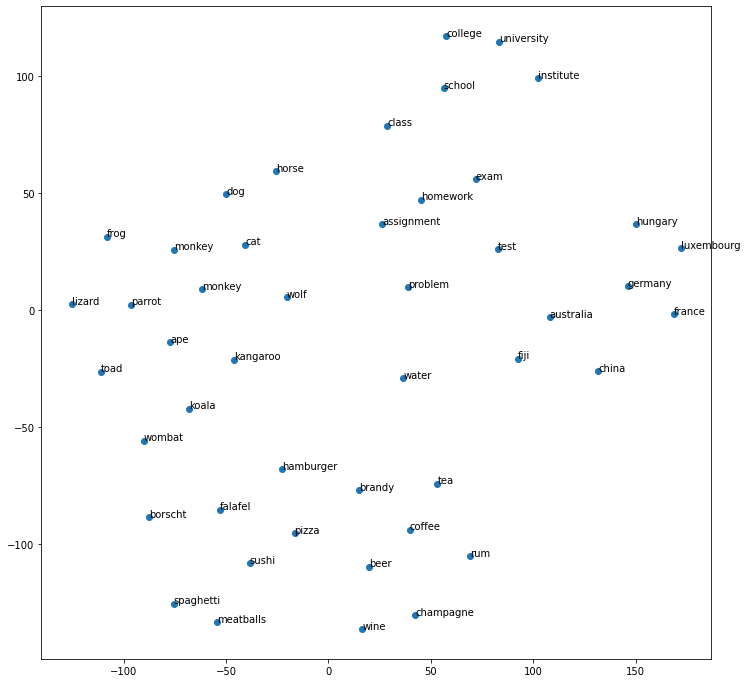

In [54]:
word_list = ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute']

plot_embeddings(model, words=word_list, reduction='tsne') 

We will now use these pre-computed embeddings to build the document representations.  
A simple way to compute a document representation from word embeddings consists in computing the mean or the sum of all the document's word embeddings.  
Here, since the documents do not have the same length, it is preferable to use the mean.  
Fill in the following code to compute the mean embeddings of all documents.  
Since this process is a little bit long, we will use a limited amount of documents during the practical session. Nonetheless, feel free to try with the complete dataset at home.  

In [55]:
from tqdm import tqdm
tqdm.pandas()

traindf = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(1000)
testdf = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(200)

traindf['label'] = traindf['label'] -1
traindf['label_name'] = traindf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf['label'] = testdf['label'] -1
testdf['label_name'] = testdf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})

def compute_mean_embeddings(s, model, words_list, dim=100):
  s = s.lower() # convert to lower case
  emb_list = [model[w] for w in s if w in words_list]
  if emb_list != []:
    return np.mean(emb_list, axis=0) # compute the mean
  else:
    return np.zeros(dim) # return a vector filled with 0 if the list is empty

words_list = model.index2entity
traindf['mean_embeddings'] = traindf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))
testdf['mean_embeddings'] = testdf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))

100%|██████████| 200/200 [00:48<00:00,  4.12it/s]


The following code extracts the computed embeddings from the dataframe.  
Use these to train a model to predict the article category.  
Print your testing performance and plot a confusion matrix.  
The results may be a little bit disappointing. Any idea why?

Model score on training data: 1.00
Model score on test data: 0.46


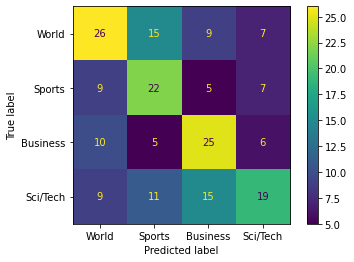

In [56]:
X_train = np.vstack(traindf['mean_embeddings'].values)
X_test = np.vstack(testdf['mean_embeddings'].values)


rf = RandomForestClassifier()
rf.fit(X_train, traindf.label)
print(f"Model score on training data: {rf.score(X_train, traindf.label):.2f}")
print(f"Model score on test data: {rf.score(X_test, testdf.label)}")

predictions = rf.predict(X_test)
cm = confusion_matrix(testdf.label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["World", "Sports", "Business", "Sci/Tech"])
disp.plot()
plt.show()

Plot a t-SNE of the computed embeddings.  
Is it a good representation to classify documents? NOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

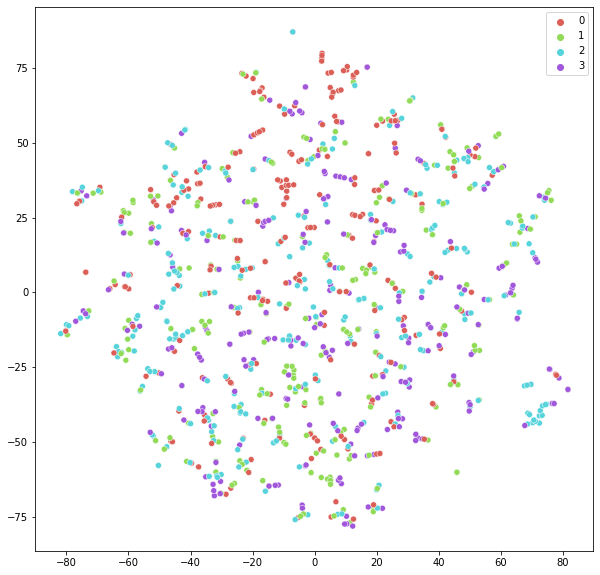

In [57]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X_train)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

We will now try with custom Word2Vec representations.  
Gensim allows to train Word2Vec representations in a few lines of codes.  
Since our vocabullary is smaller than the one used for the pre-computed Word2Vec, we can now use more samples (the embedding look-up will be cheaper to process).

In [58]:
traindf = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(10000)
testdf = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(1000)

traindf['label'] = traindf['label'] -1
traindf['label_name'] = traindf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})
testdf['label'] = testdf['label'] -1
testdf['label_name'] = testdf.label.map({0:"World", 1:"Sports", 2:"Business", 3:"Sci/Tech"})

It might be worth applying our tokenizer to reduce the vocabulary size.  
Fill the following code to create a new field with tokenized texts.

In [59]:
traindf["tokenized"] = traindf.text.apply(lambda s: tokenizer(s))
testdf["tokenized"] = testdf.text.apply(lambda s: tokenizer(s))

We will now train our own Word2Vec.  
Look at the official [documentation](https://radimrehurek.com/gensim/models/word2vec.html).  
What does the ```window``` argument stands for? What type of model are we using (CBOW or Skip-gramm).

In [60]:
from gensim.models import Word2Vec

model=Word2Vec(traindf["tokenized"],size=100,window=5,min_count=2)
model.train(traindf["tokenized"], total_examples=model.corpus_count, epochs=200)

(47160903, 60810000)

Now train a model on these custom embeddings and evaluate it on the testing set.

In [61]:
words_list = model.wv.index2entity
traindf['mean_embeddings'] = traindf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))
testdf['mean_embeddings'] = testdf.text.progress_apply(lambda s: compute_mean_embeddings(s, model, words_list))

X_train = np.vstack(traindf['mean_embeddings'].values)
X_test = np.vstack(testdf['mean_embeddings'].values)

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
100%|██████████| 1000/1000 [00:14<00:00, 69.71it/s]


Model score on training data: 1.00
Model score on test data: 0.483


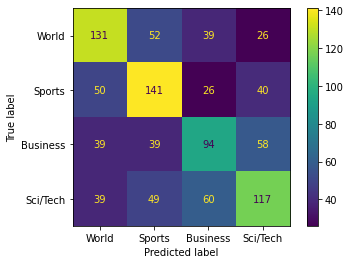

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, traindf.label)
print(f"Model score on training data: {rf.score(X_train, traindf.label):.2f}")
print(f"Model score on test data: {rf.score(X_test, testdf.label)}")

predictions = rf.predict(X_test)
cm = confusion_matrix(testdf.label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["World", "Sports", "Business", "Sci/Tech"])
disp.plot()
plt.show()

PLot a t-SNE of these new embeddings (use the test set to avoid to many points).  Does it seem better?

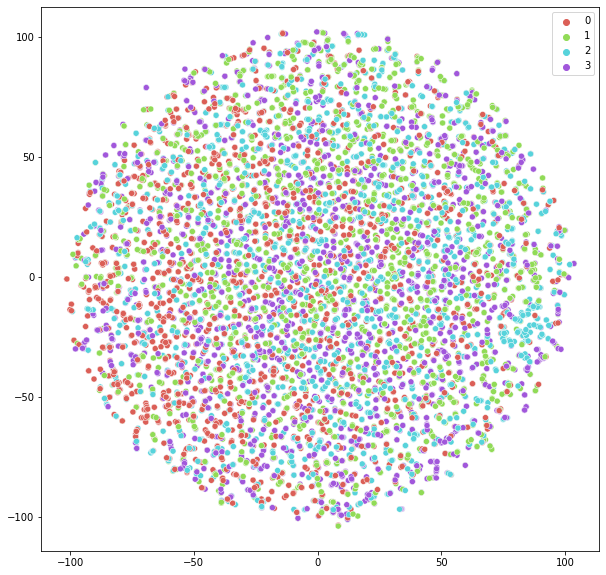

In [65]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X_train)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=traindf["label"].tolist())
plt.show()

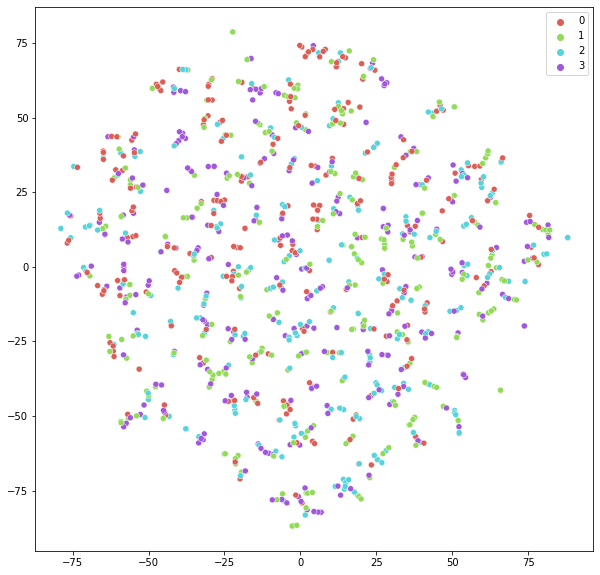

In [64]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity= 3).fit_transform(X_test)
plt.figure(figsize=(10,10))                  
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=sns.color_palette("hls", 4),hue=testdf["label"].tolist())
plt.show()

Word2Vec is an self-supervised learning of words represenations. Thus all words representations are meaningfull and have an equal impact when computing the mean.  This means that category irrelevant words have an equal importance in the document average represenatation than other words more related to the category.  
Computing the average of word embeddings learned with self-supervised learning is not very efficient for document classification.  
In the following we will see two alternatives using deep neural networks:


1.   Replace the mean by a recurrent layer responsible for filtering informative words within the sequence
2.   Learn our word embeddings at the same time as we learn the classification function



For the rest of this notebook we will need a GPU to speed-up trainings.  
Go to __Runtime__ and change your runtime type to GPU.  
Then run the following command and retart your runtype.

In [66]:
!pip3 install torch==1.9.1+cu111
!pip3 install torchtext==0.10.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement torch==1.9.1+cu111 (from versions: 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.3.0, 1.3.1, 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1, 1.13.0)
ERROR: No matching distribution found for torch==1.9.1+cu111
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 37.0 MB/s 
     |████████████████████████████████| 831.4 MB 6.8 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pi

Since we changed our runtime we need to re-download the datasets.

In [67]:
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv 2>&1
!wget https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/test.csv 2>&1

--2022-11-14 14:01:40--  https://github.com/mhjabreel/CharCnn_Keras/raw/master/data/ag_news_csv/train.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv [following]
--2022-11-14 14:01:40--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv.4’

train.csv.4         100%[===================>]  28.10M  --.-KB/s    in 0.08s   

2022-11-14 14:01:40 (370 MB/s) - ‘train.csv.4’ saved [29470338/29470338]



The following code will load the datasets in a format compatible with pytorch.  
During the process, texts will be tokenized using the [Spacy tokenizer](https://spacy.io/usage/linguistic-features#how-tokenizer-works), we won't need to do it ourself.

In [68]:
import torch
import torchtext
from torchtext.legacy.data import Field, LabelField, TabularDataset, BucketIterator

TEXT = Field(tokenize='spacy',batch_first=True,include_lengths=True)
LABEL = LabelField(dtype = torch.long, batch_first=True)
fields = [('label', LABEL), ('title', TEXT), ('text',TEXT)]
trainset = TabularDataset(path = 'train.csv',format = 'csv',fields = fields, skip_header = True)
testset = TabularDataset(path = 'test.csv',format = 'csv',fields = fields, skip_header = True)

/usr/local/lib/python3.7/dist-packages/torchtext/data/utils.py:123: UserWarning: Spacy model "en" could not be loaded, trying "en_core_web_sm" instead
  warnings.warn(f'Spacy model "{language}" could not be loaded, trying "{OLD_MODEL_SHORTCUTS[language]}" instead')


Here is an example of one sample of the processed dataset.

In [69]:
print(vars(trainset.examples[0]))

{'label': '3', 'title': ['Carlyle', 'Looks', 'Toward', 'Commercial', 'Aerospace', '(', 'Reuters', ')'], 'text': ['Reuters', '-', 'Private', 'investment', 'firm', 'Carlyle', 'Group,\\which', 'has', 'a', 'reputation', 'for', 'making', 'well', '-', 'timed', 'and', 'occasionally\\controversial', 'plays', 'in', 'the', 'defense', 'industry', ',', 'has', 'quietly', 'placed\\its', 'bets', 'on', 'another', 'part', 'of', 'the', 'market', '.']}


We will used the same pre-trained Word2Vec than previously.  
Once again, since we changed our runtime, we need to download the corresponding files.

In [70]:
!wget https://nlp.stanford.edu/data/glove.6B.zip 
!unzip glove.6B.zip > /dev/null 2>&1

--2022-11-14 14:02:27--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-14 14:02:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

glove.6B.zip.3        8%[>                   ]  71.37M  4.99MB/s    eta 2m 3s  ^C


The following code loads the pre-computed embeddings and builds the corresponding vocabulary.

In [71]:
glove = torchtext.vocab.Vectors('glove.6B.100d.txt')
TEXT.build_vocab(trainset,min_freq=3)
TEXT.vocab.set_vectors(glove.stoi, glove.vectors, dim=100)
LABEL.build_vocab(trainset)

100%|█████████▉| 399999/400000 [00:13<00:00, 30048.71it/s]


In [72]:
torch.cuda.init()
torch.cuda.empty_cache()
print('CUDA MEM:',torch.cuda.memory_allocated())

print('cuda:', torch.cuda.is_available())
print('cude index:',torch.cuda.current_device())

CUDA MEM: 0
cuda: True
cude index: 0


We will use a [```BucketIterator```](https://torchtext.readthedocs.io/en/latest/data.html#bucketiterator) to generate mini-batches of token sequences.  
BucketIterators generate batches of examples of similar lengths while minimizing the amount of padding needed (padding here corresponds to adding a padding token to the sequence).  
The ```sort_key``` parameter is used to sort text sequences in batches. Here we want to use sequences of similar length, so we use a function returning a sequence's length.  
This is used with the complementary argument ```sort_with_batch```, which indicates sorting sequences with mini-batches only and not within the entire dataset.

In [73]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
batch_size = 64

train_loader, test_loader = BucketIterator.splits(
    (trainset, testset), 
    batch_size = batch_size,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device = device)

We will now define our network architecture.  
It is composed of:

*   an embedding layer responsible for the mapping between tokens
*   several recurrent LSTM layers
*   a final fully connected layer

Here we will use pretrained embeddings and freeze their "weights".  
This is maybe to new for asking you to implement the architecture yourself, but make an effort to understand the following code.  

In [74]:
import torch.nn as nn

class TextClassifier(nn.Module):
    
  def __init__(self, vocab, embedding_dim, hidden_dim=32, nb_lstm_layers=2, dropout=0.2, output_dim=4):
      super().__init__()          
      
      #embedding layer
      self.embedding = nn.Embedding.from_pretrained(TEXT.vocab.vectors)
      self.embedding.weight.requires_grad = False
      self.lstm = nn.LSTM(embedding_dim, 
                          hidden_dim, 
                          num_layers=nb_lstm_layers, 
                          dropout=dropout,
                          batch_first=True)
      self.fc = nn.Linear(hidden_dim, output_dim)
      
  def forward(self, text, text_lengths): 
      embedded = self.embedding(text)    
      #packed sequence
      packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
      _, (hidden, cell) = self.lstm(packed_embedded)
      outputs=self.fc(hidden[1])        
      return outputs

Complete the following code to implement the training and testing routines.

In [76]:
from tqdm.notebook import tqdm


def test(model, dataloader):
    model.eval()
    test_corrects = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            text, text_lengths = data.text
            labels = data.label

            pred = model(text, text_lengths).squeeze()
            _, predicted = pred.max(1)
            test_corrects += predicted.eq(labels).sum().item()
            total += labels.size(0)
    return test_corrects / total


def train(model, dataloader, optimizer, criterion, epochs=5):
  model.train()  
  for epoch in range(epochs): 
    running_loss = 0.0
    running_corrects = 0
    total = 0 
    t = tqdm(dataloader)
    for i, batch in enumerate(t):
      text, text_lengths = batch.text
      labels = batch.label

      pred = model(text, text_lengths).squeeze() #convert to 1D tensor
      loss = criterion(pred, labels)
      
      _, predicted = pred.max(1) #...
      running_corrects += predicted.eq(labels).sum().item() # ...
      total += labels.size(0) #...
      running_loss += loss.item()

      #zero grad your optimizer
      optimizer.zero_grad()
      
      # backward the loss  
      loss.backward()

      # perform a step
      optimizer.step()
            
      t.set_description(f"epoch:{epoch} loss: {(running_loss / (i+1)):.4f} current accuracy:{round(running_corrects / total * 100, 2)}%")

Now, instantiate a model and its corresponding optimizer, choose the right criterion (loss function) to train your model, and evaluate its performance on both the training and testing sets.

In [80]:
import torch.optim as optim
embedding_size = 100
model =  TextClassifier(len(TEXT.vocab),embedding_size).to(device) # send your model to gpu with .to(device)
optimizer = optim.Adam(model.parameters()) # use Adam with defautl parameters
criterion = nn.CrossEntropyLoss() # choose the correct criterion
print(model)

TextClassifier(
  (embedding): Embedding(48117, 100)
  (lstm): LSTM(100, 32, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=32, out_features=4, bias=True)
)


In [81]:
train(model, train_loader, optimizer, criterion, epochs=5)
train_acc = test(model, train_loader)
print(f"Train accuracy: :{round(train_acc * 100, 2)}%")
test_acc = test(model, test_loader)
print(f"Test accuracy: :{round(test_acc * 100, 2)}%")

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

Train accuracy: :88.7%
Test accuracy: :87.6%



We saw that using the mean of embeddings learned by self-supervised learning is ineffective.  
This comes from the fact that all the words present in the corpus are given equal importance.  
Another solution could be to learn the embeddings while learning to classify.  
We will do this now, still using the mean to compute the final text representation.  
To do so, we will use a particular layer in pytorch called [```EmbeddingBag```](https://pytorch.org/docs/stable/generated/torch.nn.EmbeddingBag.html#torch.nn.EmbeddingBag).  
This layer computes the mean value of a “bag” of embeddings. Although the text entries here have different lengths, nn.EmbeddingBag module requires no padding here since it only computes the means.  
We will now implement a simple network as illustarted bellow computing the mean of embeddings to classify texts.  
This time we wont freeze the embeddings since we are aiming to learn theme while learning to classify.  
![](https://pytorch.org/tutorials/_images/text_sentiment_ngrams_model.png)  
Source (https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html)

In [82]:
class TextClassifier(nn.Module):

  def __init__(self, vocab_size, embedding_dim, output_dim=4):
    super().__init__()  
    self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim, sparse=True)
    self.fc = nn.Linear(embedding_dim, output_dim)

  def forward(self, text, _): # we just add a third factice _ argument to make this forward compatible with our previous training method
    embedded = self.embedding(text)
    return self.fc(embedded)

  def get_embeddings(self, text):
    return self.embedding(text)

We need to build a new vocabulary from our corpus.

In [83]:
TEXT.build_vocab(trainset,min_freq=3)
vocab_size = len(TEXT.vocab)

Now, instantiate a model and its corresponding optimizer, choose the right criterion to train your model, and evaluate its performance on both the training and testing sets.

In [86]:
model = TextClassifier(len(TEXT.vocab),embedding_size ).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
train(model, train_loader, optimizer, criterion, epochs=5)
train_acc = test(model, train_loader)
print(f"Train accuracy: :{round(train_acc * 100, 2)}%")
test_acc = test(model, test_loader)
print(f"Test accuracy: :{round(test_acc * 100, 2)}%")

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

Train accuracy: :81.06%
Test accuracy: :80.54%


Is the obtained test perfoamnce better than the one of the previous models using the mean?

Now try to do the same but using LSTM layer instead of embeddings averages.

In [100]:
import torch.nn as nn

class TextClassifier(nn.Module):
    
  def __init__(self, vocab_size, embedding_dim, output_dim=4, hidden_dim=32, nb_lstm_layers=2, dropout=0.2):
    super().__init__()  
    self.embedding = nn.EmbeddingBag(vocab_size, embedding_dim, sparse=True)
    self.lstm = nn.LSTM(embedding_dim, 
                    hidden_dim, 
                    num_layers=nb_lstm_layers, 
                    dropout=dropout,
                    batch_first=True)
    self.fc = nn.Linear(embedding_dim, output_dim)
      
  def forward(self, text, text_lengths): 
      embedded = self.embedding(text)    
      #packed sequence
     # packed_embedded = ...
      # _, (hidden, cell) = ...
      #outputs = ... 
      packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
      _, (hidden, cell) = self.lstm(packed_embedded)
      outputs=self.fc(hidden[1])     
      return outputs

In [101]:
model = TextClassifier(len(TEXT.vocab),embedding_size ).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5)
train(model, train_loader, optimizer, criterion, epochs=5)
train_acc = test(model, train_loader)
print(f"Train accuracy: :{round(train_acc * 100, 2)}%")
test_acc = test(model, test_loader)
print(f"Test accuracy: :{round(test_acc * 100, 2)}%")

  0%|          | 0/1875 [00:00<?, ?it/s]

RuntimeError: ignored

# Transformers ! 

Transformers models are the current state-of-the-art in natural language processing.  
We have not seen them during the video lectures since studying transformers would require an entire session in itself.  
Nonetheless, we will see how to use them as "black-box" models to finish this practical session.

Let $\mathbf{X} \in \mathbb{R}^{B  \times N\times F}$ be the input sequence, $\mathbf{W}^Q, \mathbf{W}^K, \mathbf{W}^V \in \mathbb{R}^{F \times H}$ be the query, key and value projection matrix.

We define the query, the key and the value as $\mathbf{Q}=\mathbf{X} \mathbf{W}^Q, \mathbf{K}=\mathbf{X} \mathbf{W}^K, \mathbf{V}=\mathbf{X} \mathbf{W}^V \in \mathbb{R}^{B \times N\times H}$.

Self attention compute a score $E =\frac{\mathbf{Q K}^T}{\sqrt{d_k}} \ \in \mathbb{R}^{B \times N\times N}$ that measure the similarity between the elements in the input sequence.
The normalized attention weights $\alpha_{i j}=\frac{\exp \left(e_{i j}\right)}{\sum_{k=1}^{T_x} \exp \left(e_{i k}\right)}$ are computed using softmax function on $E$ 

The output of the self attention layer is given by : 
$$\mathbf{Y}=\operatorname{Attention}(\mathbf{Q}, \mathbf{K}, \mathbf{V})=\operatorname{softmax}\left(\frac{\mathbf{Q} \mathbf{K}^T}{\sqrt{d_k}}\right) \mathbf{V}$$. The features of each sequence element are therefore weighted according to the context.
It is possible to use several attention mechanisms in parallel and aggregate them to obtain the final output : 
$$MultiHead(\mathbf{Q}, \mathbf{K}, \mathbf{V})= Concat \left(\right. head _1, \ldots, head \left._h\right) \mathbf{W}^O$$

where $head_i= Attention \left(\mathbf{Q} \mathbf{W}_i^Q, \mathbf{K} \mathbf{W}_i^K, \mathbf{V} \mathbf{W}_i^V\right)$

[Hugging Face](https://huggingface.co/) provides the most practical [library](https://huggingface.co/docs/transformers/main/en/index) to use transformers and pre-trained models.

In [102]:
!pip install transformers[torch] 2>&1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 32.9 MB/s 
     |████████████████████████████████| 7.6 MB 38.8 MB/s 
     |████████████████████████████████| 163 kB 37.3 MB/s 


In [114]:
import pandas as pd

train_df = pd.read_csv('train.csv', names=["label", "title", "text"]).sample(40000)
test_df = pd.read_csv('test.csv', names=["label", "title", "text"]).sample(2000)

Separate the train set into a train and validation sets using sklearn's **train_test_split**.

Keep 20% of the data for the validation set, and remember to stratify! 

In [115]:
from sklearn.model_selection import train_test_split

train, val, train_labels, val_labels = train_test_split(train_df['text'], train_df['label'], test_size=0.2, random_state=42)

\As with for computer vision, it is possible to use pre-trained models for transfer learning in NLP. 
[Bert](https://arxiv.org/abs/1810.04805) is one of the most famous standard transformer in NLP. In in its largest form it is composed of 345 million parameters.  
In this practical session we will use a smaller version: Distilbert. [Distilbert](https://arxiv.org/abs/1910.01108) is a smaller model that has been trained to mimic the outputs of the Bert model.   
This [distillation](https://arxiv.org/abs/1503.02531) process provides a model achieving very good performance with much less parameters.  
To use pre-trained model we will need to match the toke they were trained on.
Here we will uses the use the ```DistilBertTokenizerFast``` to manage the texts preprocessing. 

In [116]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

We will also need wrap our datasetd into Pytorch compatible datasets.  
The following code defines a Torch Dataset to handle our textual data.

In [117]:
import torch
from torch.utils.data import Dataset

class NlpDataset(Dataset):
    def __init__(self,data,labels,tokenizer):
        self.data = data.to_list()
        self.labels = labels.tolist()
        self.encodings = tokenizer(self.data, truncation=True, padding=True)

    def __getitem__(self,idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx],dtype=torch.long)
        return item
  
    def __len__(self):
        return len(self.labels)

Convert your datasets to torch compatible Datasets.

In [120]:
from torch.utils.data import DataLoader

train_dataset = NlpDataset(train, train_labels-1, tokenizer)
val_dataset = NlpDataset(val, val_labels-1, tokenizer)
test_dataset = NlpDataset(test_df["text"], test_df["label"]-1, tokenizer)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=64)
val_loader = DataLoader(val_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=1) # we need a batch size at 1 for later in the notebook

Look at a sample yielded by your train loader.  
What type of object is that? Do you know what it is composed of?

In [121]:
next(iter(train_loader))

{'input_ids': tensor([[  101,  2548,  2630,  ...,     0,     0,     0],
         [  101,  4533,  4614,  ...,     0,     0,     0],
         [  101,  9706,  1011,  ...,     0,     0,     0],
         ...,
         [  101,  6970,  6954,  ...,     0,     0,     0],
         [  101, 26665,  1011,  ...,     0,     0,     0],
         [  101, 13581,  2998,  ...,     0,     0,     0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'labels': tensor([1, 0, 3, 1, 3, 3, 0, 1, 2, 2, 1, 0, 1, 1, 3, 2, 2, 3, 3, 3, 3, 3, 3, 0,
         0, 3, 2, 0, 3, 1, 0, 3, 0, 3, 1, 2, 2, 2, 3, 2, 3, 2, 0, 0, 2, 3, 2, 1,
         0, 3, 0, 2, 1, 2, 1, 3, 0, 0, 0, 0, 2, 1, 0, 1])}

We will now instanciate our model and wrapp it into a Pytorch module.

In [122]:
from transformers import  DistilBertForSequenceClassification
import torch.nn as nn 

class BertClf(nn.Module):

    def __init__(self, distilbert):

        super(BertClf, self).__init__()

        self.distilbert = distilbert
        for name, param in distilbert.named_parameters():
            if not "classifier" in name:
                param.requires_grad = False

    def forward(self, sent_id, mask):

        #pass the inputs to the model  
        out = self.distilbert(sent_id, attention_mask=mask)
        logits = out.logits
        attn = out.attentions
        hidden_states = out.hidden_states
        

        return logits, hidden_states, attn

distilbert = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                                  num_labels=4,
                                                                  output_attentions=True,
                                                                  output_hidden_states=True)

model = BertClf(distilbert)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifi

Now complete the following training and testing loops.

In [128]:
from tqdm.notebook import tqdm

def train_bert(model, optimizer, dataloader, epochs, criterion):
  model.train()
  for epoch in range(epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    t = tqdm(dataloader)
    for i, batch in enumerate(t):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)
        preds, _, _ = model(input_ids,mask=attention_mask)
        
        loss = criterion(preds, labels)
        
        #zero grad your optimizer
        optimizer.zero_grad()
        
        # backward the loss  
        loss.backward()

        # perform a step
        optimizer.step()

        _, predicted = preds.max(1)
        running_corrects += predicted.eq(labels).sum().item()
        total += labels.size(0)
        running_loss += loss.item()


        t.set_description(f"epoch:{epoch} loss: {(running_loss / (i+1)):.4f} current accuracy:{round(running_corrects / total * 100, 2)}%")

def test_bert(model, dataloader):
    model.eval()
    test_corrects = 0
    total = 0
    with torch.no_grad():
      for batch in tqdm(dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        preds, _, _ = model(input_ids,mask=attention_mask)
        _, predicted = preds.max(1)
        test_corrects += predicted.eq(labels).sum().item()
        total += labels.size(0)
    return test_corrects / total

Now train a model for one epoch and print its accuracy on the test set.

In [129]:
from transformers import DistilBertTokenizerFast,  DistilBertForSequenceClassification, AdamW

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = AdamW(model.parameters(),lr = 1e-5)
criterion  = nn.CrossEntropyLoss()
n_epochs = 1

train_bert(model, optimizer, train_loader, n_epochs, criterion)
test_bert(model, test_loader)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

0.8325

The following code computes the embeddings generated by the DistilBert model.  
Use it to plot a t-SNE of the DistilBert's represntations of the test set.  
How are the different classes distributed?

In [130]:
import numpy as np

def get_embeddings(model, dataloader):
    model.eval()
    embeddings = []
    labels = []
    with torch.no_grad():
      for batch in tqdm(dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels.append(batch["labels"].item())

        _, emb, _ = model(input_ids,mask=attention_mask)
        last_layer_cls = emb[-1][:,0,:]
        embeddings.append(last_layer_cls.squeeze(0).squeeze(0))
    embeddings = np.array([e.cpu().numpy() for e in embeddings])
    return embeddings, labels

embeddings, labels = get_embeddings(model, test_loader)

  0%|          | 0/2000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


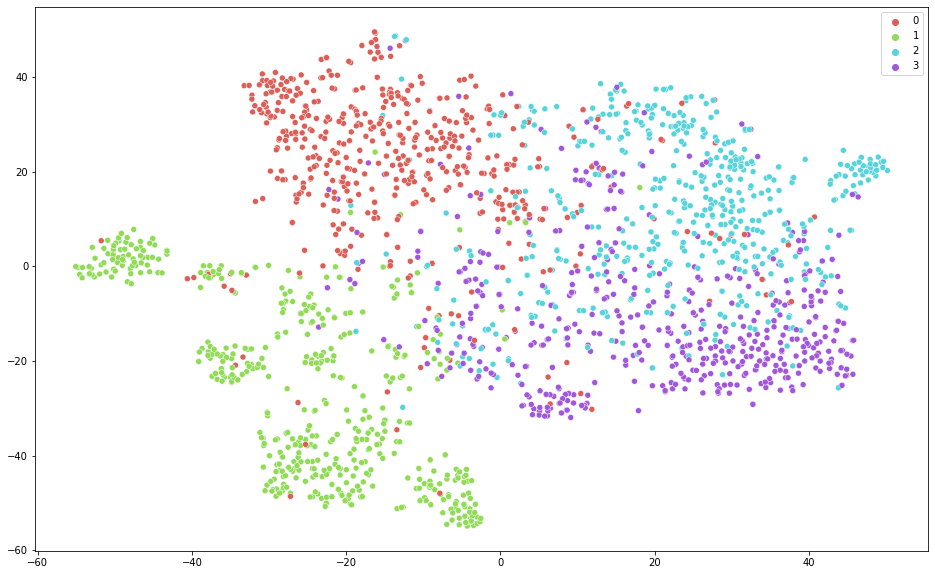

In [131]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns 

tsne = TSNE(n_components=2, init='random')
X_tsne = tsne.fit_transform(embeddings)
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=labels,
    palette=sns.color_palette("hls", 4),
    legend="full")

We can[ **bertviz** library](https://github.com/jessevig/bertviz) to visualize the relation of the element in the input sequence

In [132]:
!pip install bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 157 kB 31.4 MB/s 
     |████████████████████████████████| 1.3 MB 54.3 MB/s 
     |████████████████████████████████| 132 kB 64.2 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 9.9 MB 3.9 MB/s 
     |████████████████████████████████| 140 kB 71.8 MB/s 
     |████████████████████████████████| 127 kB 68.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [133]:
from bertviz import model_view,head_view

sentence = test_df["text"].iloc[33]
tokenized = tokenizer(sentence)
print(sentence)
print(tokenized)

Software allows users of personal digital assistants to make free calls using Wi-Fi networks.
{'input_ids': [101, 4007, 4473, 5198, 1997, 3167, 3617, 16838, 2000, 2191, 2489, 4455, 2478, 15536, 1011, 10882, 6125, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [134]:
inputs = torch.tensor(tokenized["input_ids"]).unsqueeze(0).to(device)
mask = torch.tensor(tokenized["attention_mask"]).unsqueeze(0).to(device)
outputs = model(inputs,mask = mask)
attention = outputs[-1] 
tokens = tokenizer.convert_ids_to_tokens(inputs[0]) 
model_view(attention, tokens)

<IPython.core.display.Javascript object>

In [135]:
head_view(attention, tokens)

<IPython.core.display.Javascript object>